Load Distribution for the default schedule
---------------------------------------------
Average loads:  133968.8625
Std loads:  19189.319645146195
Max Load:  192395.0
Min Load:  71947.0


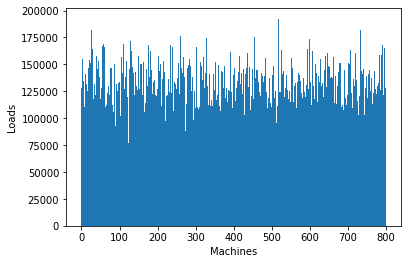

In [4]:
#This is the new load balancing results. Data acquired on feb 08 from Arif Khan. This is what Ajay is doing for scheduling.
import matplotlib.pyplot as plt
import numpy as np

n_machines = 800
sched_ajay = "GC_BP/gc_bp_"+str(n_machines)+".csv"
data_sched_ajay = np.genfromtxt(sched_ajay,dtype=int,delimiter=',',skip_header=1)



loads_ajay = np.zeros(n_machines)
for i in range(data_sched_ajay.shape[0]):
    loads_ajay[data_sched_ajay[i,0]] = loads_ajay[data_sched_ajay[i,0]] + data_sched_ajay[i,3]
    
print("Load Distribution for the default schedule")
print("---------------------------------------------")
print("Average loads: ", np.mean(loads_ajay))
print("Std loads: ",np.std(loads_ajay))
print("Max Load: ",np.max(loads_ajay))
print("Min Load: ",np.min(loads_ajay))

x_data = np.arange(n_machines)
plt.bar(x_data,loads_ajay,width = 1)
plt.xlabel("Machines")
plt.ylabel("Loads")
plt.show()



Load Distribution for the submod schedule
---------------------------------------------
Average loads:  136032.48625
Std loads:  167.7745058432225
Max Load:  136278.0
Min Load:  135684.0


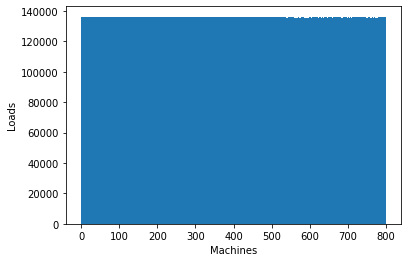

In [6]:
n_machines = 800
sched_submod = "gc_bp_"+str(n_machines)+".match"
data_sched_submod = np.genfromtxt(sched_submod,dtype=int,delimiter=',',skip_header=3)

loads_submod = np.zeros(n_machines)
for i in range(data_sched_submod.shape[0]):
    loads_submod[data_sched_submod[i,1]] = loads_submod[data_sched_submod[i,1]] + data_sched_submod[i,2]


    
print("Load Distribution for the submod schedule")
print("---------------------------------------------")
print("Average loads: ", np.mean(loads_submod))
print("Std loads: ",np.std(loads_submod))
print("Max Load: ",np.max(loads_submod))
print("Min Load: ",np.min(loads_submod))

x_data = np.arange(n_machines)
plt.bar(x_data,loads_submod,width = 1)
plt.xlabel("Machines")
plt.ylabel("Loads")
plt.show()

f = open("gc_bp_submod_"+str(n_machines)+".sched",'w')
f.write("#s1,s2,ntask,rank\n")
#writing the schedule to 4 tuples format
for i in range(data_sched_submod.shape[0]):
    s1 = data_sched_ajay[data_sched_submod[i,0],1]
    s2 = data_sched_ajay[data_sched_submod[i,0],2]
    f.write(str(s1)+","+str(s2)+","+str(data_sched_submod[i,2])+","+str(data_sched_submod[i,1])+"\n")
f.close()
    



In [1]:
#Here I will compute the mtx file from the input file. Each line of the input file contains(rank,s1,s2,ntasks). Here 
#(s1,s2) is a node in the graph. This is a bpt graph. Where on the left side would be machine id and the right side is
#id corresponding to (s1,s2) pair.

import matplotlib.pyplot as plt
import numpy as np

n_machine = 1000
#data_file = "GC_BP/gc_bp_"+str(n_machines)+".csv"
data_file = "ubi_sto3g/ubi_sto3g_4k_taskinfo.csv"
data = np.genfromtxt(data_file,dtype=int,delimiter=',',skip_header=1)
n_row = data.shape[0]

graph = np.zeros((n_row*n_machine,3))
c = 0
f = open("ubi_sto3g_"+str(n_machine)+".mtx",'w')
f.write("%%MatrixMarket matrix coordinate real symmetric\n%\n")
f.write(str(n_row+n_machine)+" "+str(n_row+n_machine)+" "+str(n_row*n_machine)+"\n")

for i in range(n_row):
    for j in range(n_machine):
        graph[c,:] = [n_row+j+1, i+1, data[i,3]]
        f.write(str(n_row+j+1)+" "+str(i+1)+" "+str(data[i,3])+"\n")
        c = c + 1
print(min(graph[:,0]))
print(min(graph[:,1]))

429894.0
1.0
